# Assignment 4
## Amey Choudhary
## 2021113017
### Question 4

In [277]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [278]:
dtc = DecisionTreeClassifier()
dtr = DecisionTreeRegressor()

### Random Forest Classifier

In [279]:
wine_dataset = pd.read_csv('../Datasets/WineQT.csv')
wine_dataset = wine_dataset.drop('Id', axis=1)
print(wine_dataset.head())
X_wine = wine_dataset.drop('quality', axis=1)
y_wine = wine_dataset['quality']
y_wine[y_wine <= 5] = 0
y_wine[y_wine > 5] = 1

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

/tmp/ipykernel_3416505/2906957695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_wine[y_wine <= 5] = 0
/tmp/ipykernel_3416505/2906957695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_wine[y_wine > 5] = 1


In [280]:
# defining a function to do random forest classification

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

def random_forest_class(num_features, num_estimators, fraction, bootstrap = True, voting_mech = 'hard'):

    X_train_bag = []
    y_train_bag = []

    # formulating the train datasets
    for i in range(num_estimators):
        X_train_bag.append(X_train.sample(frac=fraction, replace=bootstrap))
        y_train_bag.append(y_train[X_train_bag[i].index])

    models = []
    # training the models
    for i in range(num_estimators):
        model = DecisionTreeClassifier(max_features=num_features)
        model.fit(X_train_bag[i], y_train_bag[i])
        models.append(model)

    # predicting the values

    if voting_mech == 'hard':
        y_pred = []
        for i in range(num_estimators):
            y_pred.append(models[i].predict(X_test))
        y_pred = np.array(y_pred)
        y_pred = np.round(np.mean(y_pred, axis=0)) # calculates the most frequent value
        return y_pred

In [281]:
from sklearn.metrics import accuracy_score

# calculating the accuracy
y_pred = random_forest_class(10, 200, 0.6)
print(accuracy_score(y_test, y_pred))


0.7685589519650655


In [282]:
# testing out for different values of num_features and num_estimators and fractions
num_features = [5, 10, 15]
num_estimators = [10, 25, 50, 100, 200]
fractions = [0.15, 0.25, 0.5, 0.75, 1]

import time
accuracy_matrix_rfc = np.zeros((len(num_features), len(num_estimators), len(fractions)))
time_matrix_rfc = np.zeros((len(num_features), len(num_estimators), len(fractions)))

for i in range(len(num_features)):
    for j in range(len(num_estimators)):
        for k in range(len(fractions)):
            start = time.time()
            y_pred = random_forest_class(num_features[i], num_estimators[j], fractions[k])
            end = time.time()
            time_matrix_rfc[i][j][k] = end - start
            accuracy_matrix_rfc[i][j][k] = accuracy_score(y_test, y_pred)
            

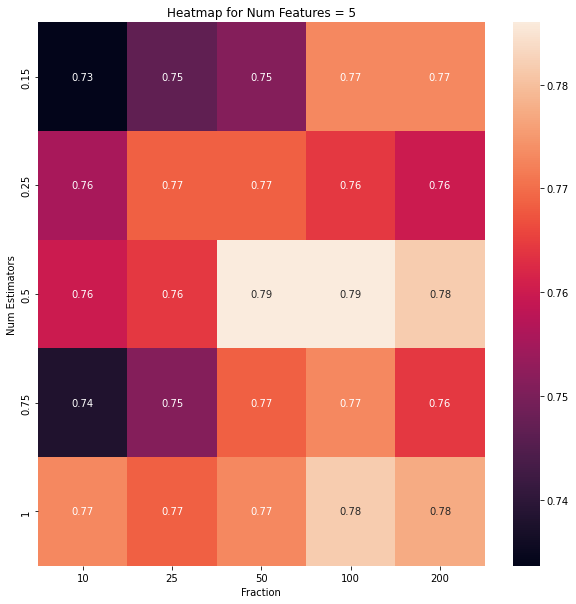

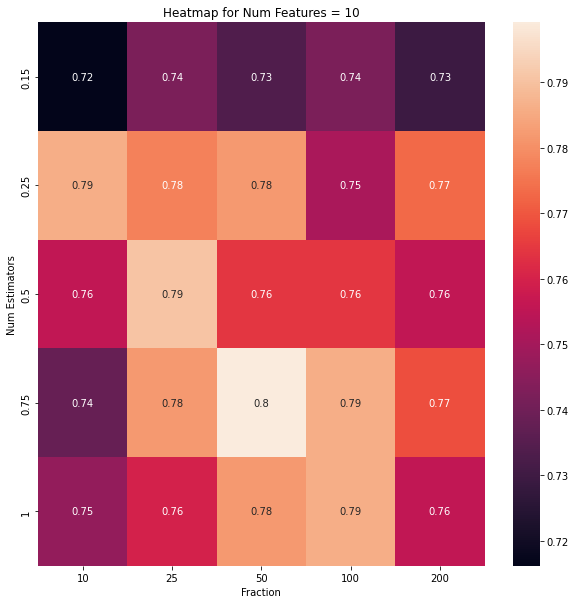

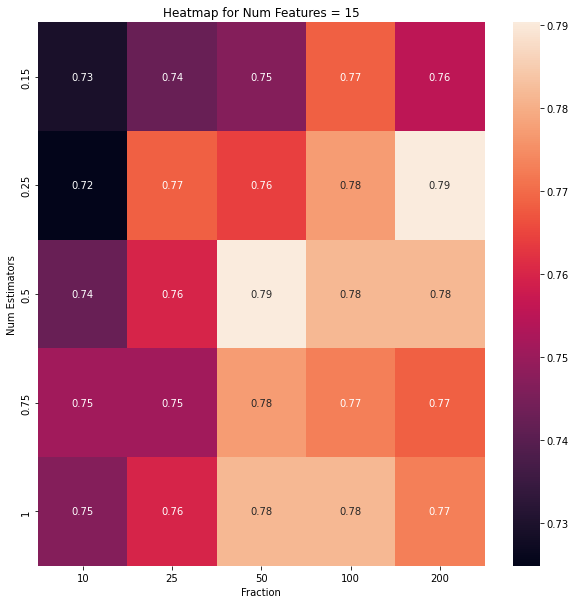

In [283]:
# making heat maps for the accuracy matrix for particular values of num features

for i in range(len(num_features)):
    plt.figure(figsize=(10, 10))
    sns.heatmap(accuracy_matrix_rfc[i], annot=True, xticklabels=num_estimators, yticklabels=fractions)
    plt.xlabel('Fraction')
    plt.ylabel('Num Estimators')
    plt.title('Heatmap for Num Features = ' + str(num_features[i]))
    plt.show()

In [284]:
# finding the best values of num_features, num_estimators and fraction
best_feature = 0
best_estimator = 0
best_fraction = 0
for i in range(len(num_features)):
    max_accuracy = np.max(accuracy_matrix_rfc[i])
    for j in range(len(num_estimators)):
        for k in range(len(fractions)):
            if accuracy_matrix_rfc[i][j][k] == max_accuracy:
                print('For Num Features = ', num_features[i], ', Num Estimators = ', num_estimators[j], ', Fraction = ', fractions[k], ', Accuracy = ', max_accuracy, 'Time = ', time_matrix_rfc[i][j][k])
                if max_accuracy > accuracy_matrix_rfc[best_feature][best_estimator][best_fraction]:
                    best_feature = i
                    best_estimator = j
                    best_fraction = k

For Num Features =  5 , Num Estimators =  50 , Fraction =  0.5 , Accuracy =  0.7860262008733624 Time =  0.1326608657836914
For Num Features =  5 , Num Estimators =  50 , Fraction =  0.75 , Accuracy =  0.7860262008733624 Time =  0.13284683227539062
For Num Features =  10 , Num Estimators =  100 , Fraction =  0.5 , Accuracy =  0.7991266375545851 Time =  0.25248265266418457
For Num Features =  15 , Num Estimators =  25 , Fraction =  1 , Accuracy =  0.7903930131004366 Time =  0.10434269905090332
For Num Features =  15 , Num Estimators =  50 , Fraction =  0.5 , Accuracy =  0.7903930131004366 Time =  0.13846802711486816


In [285]:
print('Best values are: Num Features = ', num_features[best_feature], ', Num Estimators = ', num_estimators[best_estimator], ', Fraction = ', fractions[best_fraction], ', Accuracy = ', accuracy_matrix_rfc[best_feature][best_estimator][best_fraction], 'Time = ', time_matrix_rfc[best_feature][best_estimator][best_fraction])

Best values are: Num Features =  10 , Num Estimators =  100 , Fraction =  0.5 , Accuracy =  0.7991266375545851 Time =  0.25248265266418457


### Random Forest Regression

In [286]:
# getting the dataset
boston_dataset = pd.read_csv('../Datasets/HousingData.csv')
boston_dataset = boston_dataset.dropna()

# normalising the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
boston_dataset = pd.DataFrame(scaler.fit_transform(boston_dataset), columns=boston_dataset.columns)
print(boston_dataset.head())

       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.309129  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.165975  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.165975  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.143154  0.658555  0.441813  0.448545   
4  0.000264  0.00  0.063050   0.0  0.143154  0.549722  0.574665  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989678  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994243  0.033389  0.631111  
4  0.086957  0.066794  0.648936  0.992950  0.096026  0.526667  


In [287]:
X = boston_dataset.drop('MEDV', axis=1)
y = boston_dataset['MEDV']

In [288]:
# defining the regression function of random forest

from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

def random_forest_reg(num_features, num_estimators, fraction, bootstrap= True, voting_mech = 'hard'):

    X_train_bag = []
    y_train_bag = []

    # formulating the train datasets
    for i in range(num_estimators):
        X_train_bag.append(X_train.sample(frac=fraction, replace=bootstrap))
        y_train_bag.append(y_train[X_train_bag[i].index])

    models = []
    # training the models
    for i in range(num_estimators):
        model = DecisionTreeRegressor(max_features=num_features)
        model.fit(X_train_bag[i], y_train_bag[i])
        models.append(model)

    # predicting the values

    if voting_mech == 'hard':
        y_pred = []
        for i in range(num_estimators):
            y_pred.append(models[i].predict(X_test))
        y_pred = np.array(y_pred)
        y_pred = np.mean(y_pred, axis=0) # calculates the mean value
        return y_pred
    
    if voting_mech == 'soft':
        confidences = []
        for i in range(num_estimators):
            y = models[i].predict(X_val)
            # calculating the mse 
            mse = mean_squared_error(y_val, y)
            confidences.append(1/mse)
        confidences = np.array(confidences)
        index = np.argmax(confidences)
        y_pred = models[index].predict(X_test)
        return y_pred



In [289]:
# for a simple model
y_pred = random_forest_reg(5, 100, 1)
print(mean_squared_error(y_test, y_pred))

0.016925064635099237


In [290]:
mse_matrix_rfr = np.zeros((len(num_features), len(num_estimators), len(fractions)))
time_matrix_rfr = np.zeros((len(num_features), len(num_estimators), len(fractions)))

for i in range(len(num_features)):
    for j in range(len(num_estimators)):
        for k in range(len(fractions)):
            start = time.time()
            y_pred = random_forest_reg(num_features[i], num_estimators[j], fractions[k])
            end = time.time()
            time_matrix_rfr[i][j][k] = end - start
            mse_matrix_rfr[i][j][k] = mean_squared_error(y_test, y_pred)

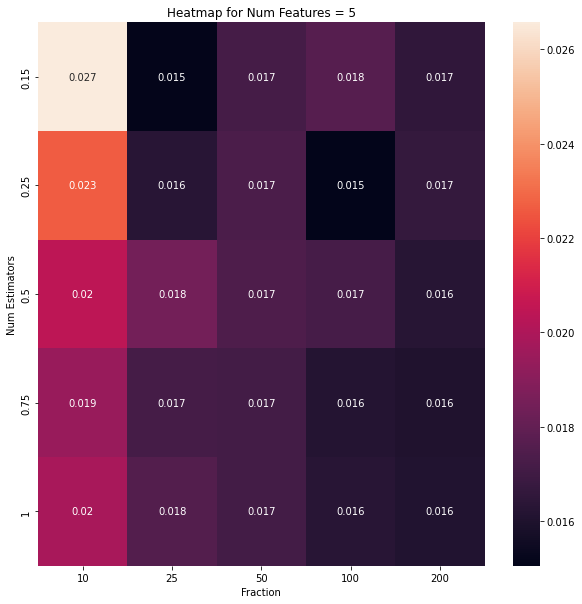

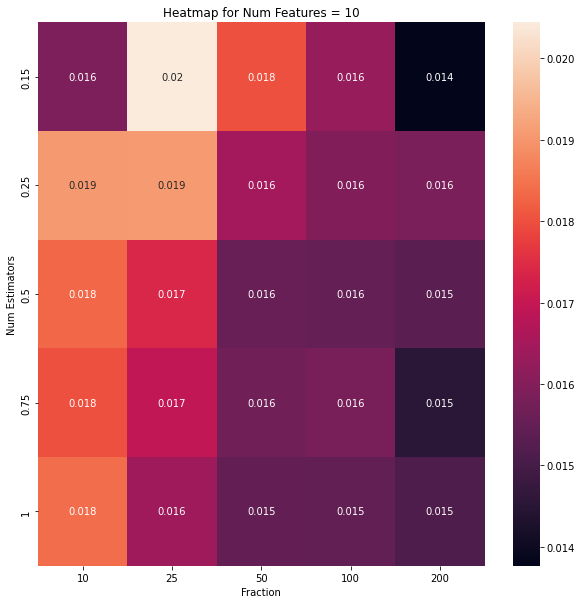

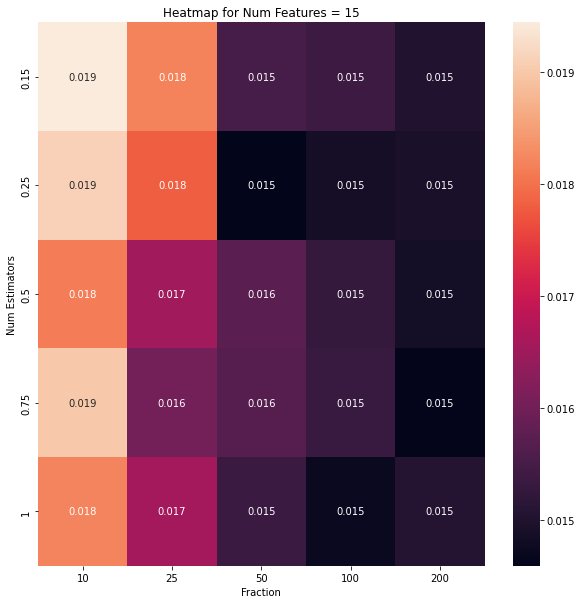

In [291]:
#  plotting the heatmaps for the mse matrix

for i in range(len(num_features)):
    plt.figure(figsize=(10, 10))
    sns.heatmap(mse_matrix_rfr[i], annot=True, xticklabels=num_estimators, yticklabels=fractions)
    plt.xlabel('Fraction')
    plt.ylabel('Num Estimators')
    plt.title('Heatmap for Num Features = ' + str(num_features[i]))
    plt.show()
    

In [292]:
#  finding the minimum mse values
best_feature = 0
best_estimator = 0
best_fraction = 0
for i in range(len(num_features)):
    min_mse = np.min(mse_matrix_rfr[i])
    for j in range(len(num_estimators)):
        for k in range(len(fractions)):
            if mse_matrix_rfr[i][j][k] == min_mse:
                print('For Num Features = ', num_features[i], ', Num Estimators = ', num_estimators[j], ', Fraction = ', fractions[k], ', MSE = ', min_mse, 'Time = ', time_matrix_rfr[i][j][k])
                if min_mse < mse_matrix_rfr[best_feature][best_estimator][best_fraction]:
                    best_feature = i
                    best_estimator = j
                    best_fraction = k

For Num Features =  5 , Num Estimators =  25 , Fraction =  0.75 , MSE =  0.015052767294889828 Time =  0.038839101791381836
For Num Features =  10 , Num Estimators =  10 , Fraction =  1 , MSE =  0.01376540771995624 Time =  0.018337011337280273
For Num Features =  15 , Num Estimators =  25 , Fraction =  0.5 , MSE =  0.014595015271136115 Time =  0.04244661331176758


In [293]:
#  we will use num_features = 15, num_estimators = 150, fraction = 0.75 for the best accuracy in random forest regression
print('Best values are: Num Features = ', num_features[best_feature], ', Num Estimators = ', num_estimators[best_estimator], ', Fraction = ', fractions[best_fraction], ', MSE = ', mse_matrix_rfr[best_feature][best_estimator][best_fraction], 'Time = ', time_matrix_rfr[best_feature][best_estimator][best_fraction])


Best values are: Num Features =  10 , Num Estimators =  10 , Fraction =  1 , MSE =  0.01376540771995624 Time =  0.018337011337280273


### ADAboost + Decision Tree

#### Classification

In [294]:
# class for ADABoost Classifier. assistance from Copilot
class ADABoostClassifier:
    
        def __init__(self, num_estimators):
            self.num_estimators = num_estimators
            self.models = []
            self.alphas = []
            self.weights = []
            self.errors = []

        def small_func(self, y, y_pred):
            list_val = [-1]*len(y)
            y = np.array(y)
            y_pred = np.array(y_pred)
            for i in range(len(y)):
                if y[i] == y_pred[i]:
                    list_val[i] = 1
            # print(list_val)
            return np.array(list_val)
    
        def fit(self, X, y):
            # initialising the weights
            self.weights = np.ones(len(X)) / len(X)
            for i in range(self.num_estimators):
                model = DecisionTreeClassifier()
                model.fit(X, y, sample_weight=self.weights)
                self.models.append(model)
                y_pred = model.predict(X)
                error = np.sum(self.weights * (y_pred != y))
                self.errors.append(error)
                if error > 1e-7:
                    alpha = 0.5 * np.log((1 - error) / error)
                else:
                    alpha = 0.5 * np.log((1 - 1e-7) / 1e-7)
                self.alphas.append(alpha)
                self.weights *= np.exp(-alpha * (self.small_func(y, y_pred)))
                self.weights /= np.sum(self.weights)
    
        def predict(self, X):
            y_pred = []
            for i in range(self.num_estimators):
                y_pred.append(self.models[i].predict(X))
            y_pred = np.array(y_pred)
            y_pred = np.round(np.mean(y_pred, axis=0)) # calculates the most frequent value
            return y_pred

In [295]:
# running on simple model
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
ada = ADABoostClassifier(100)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6812227074235808


In [296]:
# running on different values of num_estimators

num_estimators = [10, 25, 50, 100,150, 200]

import time
accuracy_matrix_ac = np.zeros(len(num_estimators))
training_time_ac = np.zeros(len(num_estimators))


for i in range(len(num_estimators)):
    ada = ADABoostClassifier(num_estimators[i])
    start = time.time()
    ada.fit(X_train, y_train)
    end = time.time()
    y_pred = ada.predict(X_test)
    accuracy_matrix_ac[i] = accuracy_score(y_test, y_pred)
    training_time_ac[i] = end - start
    print('Accuracy for num_estimators = ', num_estimators[i], ' is ', accuracy_matrix_ac[i], ' and training time is ', training_time_ac[i])

Accuracy for num_estimators =  10  is  0.6855895196506551  and training time is  0.0636444091796875


Accuracy for num_estimators =  25  is  0.6855895196506551  and training time is  0.16034913063049316
Accuracy for num_estimators =  50  is  0.7030567685589519  and training time is  0.30066585540771484
Accuracy for num_estimators =  100  is  0.6855895196506551  and training time is  0.5677106380462646
Accuracy for num_estimators =  150  is  0.6855895196506551  and training time is  0.9230771064758301
Accuracy for num_estimators =  200  is  0.6943231441048034  and training time is  1.2333335876464844


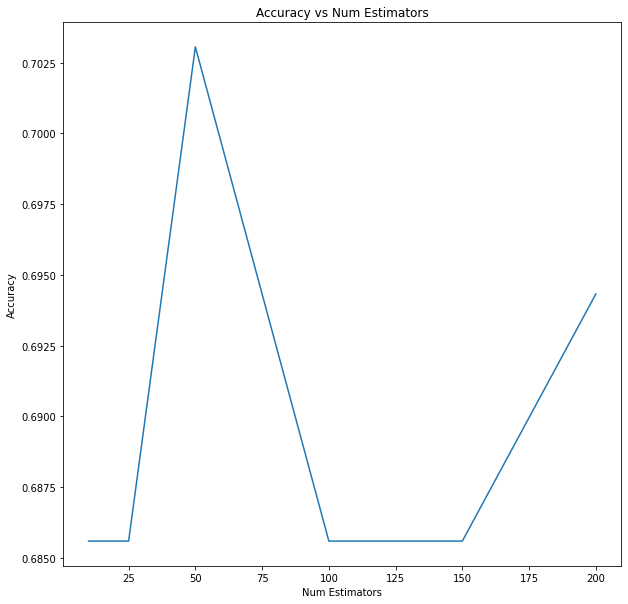

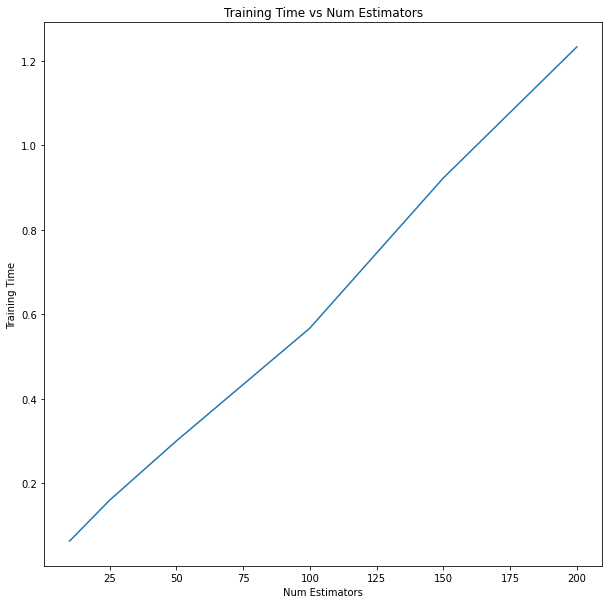

In [297]:
# plotting the accuracy matrix
plt.figure(figsize=(10, 10))
plt.plot(num_estimators, accuracy_matrix_ac)
plt.xlabel('Num Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num Estimators')
plt.show()

# plotting the training time matrix
plt.figure(figsize=(10, 10))
plt.plot(num_estimators, training_time_ac)
plt.xlabel('Num Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Num Estimators')
plt.show()


In [298]:
# find the maximum accuracy
max_accuracy = np.max(accuracy_matrix_ac)
t_max = training_time_ac[np.argmax(accuracy_matrix_ac)]

print('For ADA Boost Classifier, ')
print('Maximum accuracy is ', max_accuracy, ' and training time is ', t_max)

print('For Random Forest Classifier, ')
print('Maximum accuracy is ', np.max(accuracy_matrix_rfc[best_feature]), ' and training time is ', time_matrix_rfc[best_feature][best_estimator][best_fraction])

For ADA Boost Classifier, 
Maximum accuracy is  0.7030567685589519  and training time is  0.30066585540771484
For Random Forest Classifier, 
Maximum accuracy is  0.7991266375545851  and training time is  0.04159283638000488


#### ADA Regressor

In [299]:
# class for ADABoost Regressor. assistance from Copilot

class ADABoostRegressor:

    def __init__(self, num_estimators):
        self.num_estimators = num_estimators
        self.models = []
        self.alphas = []
        self.weights = []
        self.errors = []

    def small_func(self, y, y_pred):
        y = np.array(y)
        y_pred = np.array(y_pred)
        a = np.square(np.subtract(y, y_pred))
        b = np.ones(len(y))
        mse = mean_squared_error(y, y_pred)
        # find indexes where a <  mse
        indexes = np.where(a < mse)
        b[indexes] = -1
        return b
    
    def fit(self, X, y):
        # initialising the weights
        self.weights = np.ones(len(X)) / len(X)
        for i in range(self.num_estimators):
            model = DecisionTreeRegressor()
            model.fit(X, y, sample_weight=self.weights)
            self.models.append(model)
            y_pred = model.predict(X)
            error = np.sum(self.weights * (y_pred != y))
            self.errors.append(error)
            if error > 1e-7:
                alpha = 0.5 * np.log((1 - error) / error)
            else:
                alpha = 0.5 * np.log((1 - 1e-7) / 1e-7)
            self.alphas.append(alpha)
            self.weights *= np.exp(-alpha * (self.small_func(y, y_pred)))
            self.weights /= np.sum(self.weights)
    
    def predict(self, X):
        y_pred = []
        for i in range(self.num_estimators):
            y_pred.append(self.models[i].predict(X))
        y_pred = np.array(y_pred)
        y_pred = np.mean(y_pred, axis=0) # calculates the mean value
        return y_pred

In [300]:
# running on simple model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = random_forest_reg(5, 100, 1)
print(mean_squared_error(y_test, y_pred))


0.013862616946397874


In [301]:
# for hyperparameter tuning

num_estimators = [10, 25, 50, 100,150, 200]

import time
mse_matrix_ar = np.zeros(len(num_estimators))
training_time_ar = np.zeros(len(num_estimators))


for i in range(len(num_estimators)):
    ada = ADABoostRegressor(num_estimators[i])
    start = time.time()
    ada.fit(X_train, y_train)
    end = time.time()
    y_pred = ada.predict(X_test)
    mse_matrix_ar[i] = mean_squared_error(y_test, y_pred)
    training_time_ar[i] = end - start
    print('MSE for num_estimators = ', num_estimators[i], ' is ', mse_matrix_ar[i], ' and training time is ', training_time_ar[i])



MSE for num_estimators =  10  is  0.01207760962650414  and training time is  0.04701495170593262
MSE for num_estimators =  25  is  0.012148964575714955  and training time is  0.09423661231994629


MSE for num_estimators =  50  is  0.014902773008282553  and training time is  0.1744856834411621
MSE for num_estimators =  100  is  0.013542476711986254  and training time is  0.34126901626586914
MSE for num_estimators =  150  is  0.013559623440219708  and training time is  0.452805757522583
MSE for num_estimators =  200  is  0.01344036035630568  and training time is  0.5597045421600342


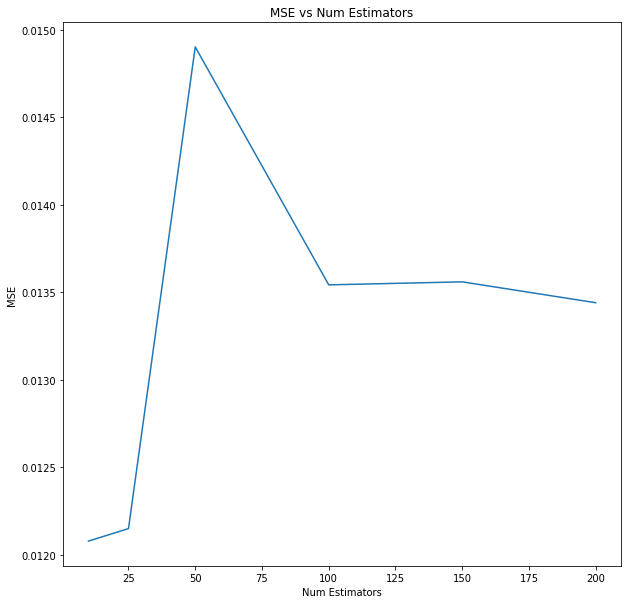

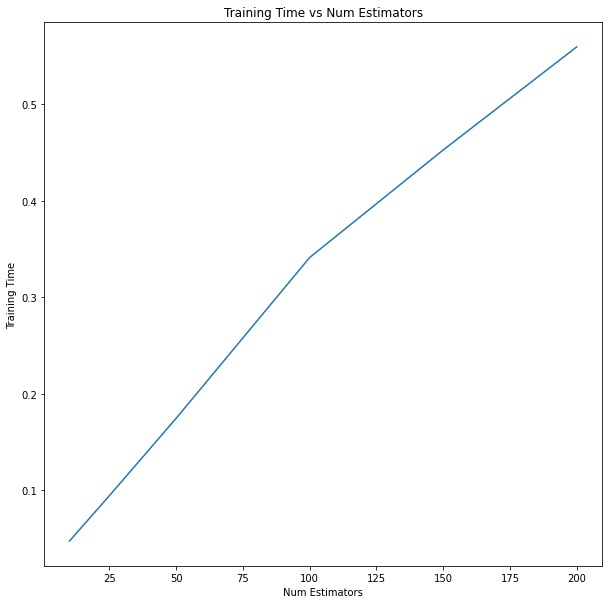

In [302]:
# plotting the mse matrix
plt.figure(figsize=(10, 10))
plt.plot(num_estimators, mse_matrix_ar)
plt.xlabel('Num Estimators')
plt.ylabel('MSE')
plt.title('MSE vs Num Estimators')
plt.show()

# plotting the training time matrix
plt.figure(figsize=(10, 10))
plt.plot(num_estimators, training_time_ar)  
plt.xlabel('Num Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Num Estimators')
plt.show()


In [303]:
# comparing the best results
print('For ADA Boost Regressor, ')
print('Minimum MSE is ', np.min(mse_matrix_ar), ' and training time is ', training_time_ar[np.argmin(mse_matrix_ar)])

print('For Random Forest Regressor, ')
print('Minimum MSE is ', mse_matrix_rfr[best_feature][best_estimator][best_fraction], ' and training time is ', time_matrix_rfr[best_feature][best_estimator][best_fraction])

For ADA Boost Regressor, 
Minimum MSE is  0.01207760962650414  and training time is  0.04701495170593262
For Random Forest Regressor, 
Minimum MSE is  0.01376540771995624  and training time is  0.018337011337280273


### Gradient Boosting + Decision Trees

#### Classification

In [304]:
class GradientBoostingClassification:
    def __init__(self, num_estimators, learning_rate=0.1):
        self.num_estimators = num_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):

        og = np.zeros(len(X))
        for i in range(self.num_estimators):
            residuals = y - og
            residuals = np.round(residuals)
            model = DecisionTreeClassifier()
            self.models.append(model)
            self.models[i].fit(X, residuals)
            update = self.learning_rate * self.models[i].predict(X)
            og = og + update

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.round(np.sum(predictions, axis=0))

In [305]:
# running on simple model
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

gbc = GradientBoostingClassification(100)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.2794759825327511


In [306]:
#  for hyperparameter tuning

num_estimators = [10, 25, 50, 100,150, 200]
learning_rate = [0.01, 0.1, 1]


import time
accuracy_matrix_gbc = np.zeros((len(num_estimators), len(learning_rate)))
training_time_gbc = np.zeros((len(num_estimators), len(learning_rate)))


for i in range(len(num_estimators)):
    for j in range(len(learning_rate)):
        gbc = GradientBoostingClassification(num_estimators[i], learning_rate[j])
        start = time.time()
        gbc.fit(X_train, y_train)
        end = time.time()
        y_pred = gbc.predict(X_test)
        accuracy_matrix_gbc[i][j] = accuracy_score(y_test, y_pred)
        training_time_gbc[i][j] = end - start
        print('Accuracy for num_estimators = ', num_estimators[i], ' and learning rate = ', learning_rate[j], ' is ', accuracy_matrix_gbc[i][j], ' and training time is ', training_time_gbc[i][j])

Accuracy for num_estimators =  10  and learning rate =  0.01  is  0.2663755458515284  and training time is  0.058277130126953125
Accuracy for num_estimators =  10  and learning rate =  0.1  is  0.26200873362445415  and training time is  0.0315399169921875
Accuracy for num_estimators =  10  and learning rate =  1  is  0.6768558951965066  and training time is  0.01836371421813965
Accuracy for num_estimators =  25  and learning rate =  0.01  is  0.2663755458515284  and training time is  0.13021349906921387
Accuracy for num_estimators =  25  and learning rate =  0.1  is  0.2663755458515284  and training time is  0.04893016815185547
Accuracy for num_estimators =  25  and learning rate =  1  is  0.7117903930131004  and training time is  0.03527998924255371
Accuracy for num_estimators =  50  and learning rate =  0.01  is  0.26200873362445415  and training time is  0.2679634094238281
Accuracy for num_estimators =  50  and learning rate =  0.1  is  0.28820960698689957  and training time is  0.0

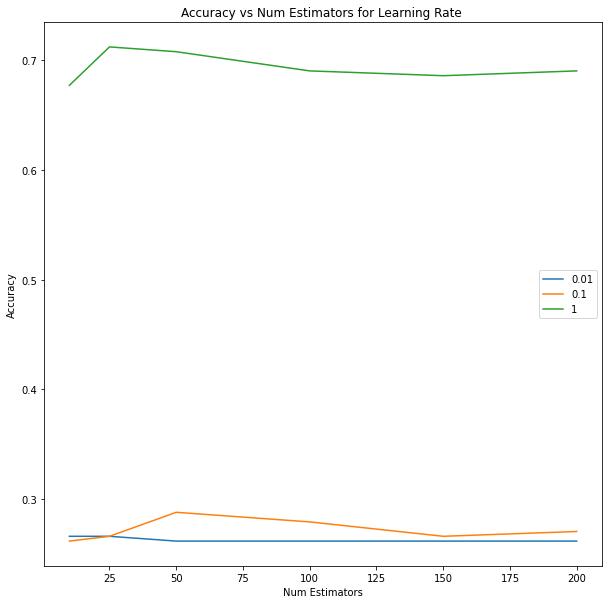

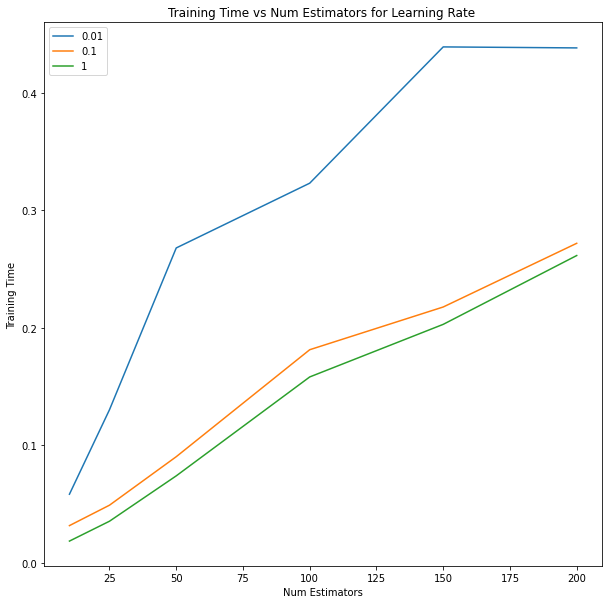

In [307]:
# plot the accuracies for different values of num_estimators and learning rate
plt.figure(figsize=(10, 10))
for i in range(len(learning_rate)):
    plt.plot(num_estimators, accuracy_matrix_gbc[:, i])
plt.xlabel('Num Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Num Estimators for Learning Rate ')
plt.legend(learning_rate)
plt.show()

# plot the training times for different values of num_estimators and learning rate
plt.figure(figsize=(10, 10))
for i in range(len(learning_rate)):
    plt.plot(num_estimators, training_time_gbc[:, i])
plt.xlabel('Num Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Num Estimators for Learning Rate ')
plt.legend(learning_rate)
plt.show()


In [308]:
# Comparing the best results
index = np.argmax(accuracy_matrix_gbc)
best_estimator = index // len(learning_rate)
best_learning_rate = index % len(learning_rate)
print('For Gradient Boosting Classifier, ')
print('Maximum accuracy is ', np.max(accuracy_matrix_gbc), ' and training time is ', training_time_gbc[best_estimator][best_learning_rate])

print('For Random Forest Classifier, ')
print('Maximum accuracy is ', np.max(accuracy_matrix_rfc[best_feature]), ' and training time is ', time_matrix_rfc[best_feature][best_estimator][best_fraction])

For Gradient Boosting Classifier, 
Maximum accuracy is  0.7117903930131004  and training time is  0.03527998924255371
For Random Forest Classifier, 
Maximum accuracy is  0.7991266375545851  and training time is  0.10137033462524414


#### Regression

In [309]:
class GradientBoostingRegression:
    def __init__(self, num_estimators, learning_rate=0.1):
        self.num_estimators = num_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):

        og = np.mean(y) * np.ones(len(X))
        for i in range(self.num_estimators):
            residuals = y - og
            model = DecisionTreeRegressor()
            self.models.append(model)
            self.models[i].fit(X, residuals)
            update = self.learning_rate * self.models[i].predict(X)
            og = og + update

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.sum(predictions, axis=0)

In [310]:
# running on simple model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegression(100)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
print(mean_squared_error(y_test, y_pred))


2.5302775467859746


In [311]:
#  for hyperparameter tuning

num_estimators = [10, 25, 50, 100,150, 200]
learning_rate = [0.01, 0.1, 1]


import time
mse_matrix_gbr = np.zeros((len(num_estimators), len(learning_rate)))
training_time_gbr = np.zeros((len(num_estimators), len(learning_rate)))


for i in range(len(num_estimators)):
    for j in range(len(learning_rate)):
        gbr = GradientBoostingRegression(num_estimators[i], learning_rate[j])
        start = time.time()
        gbr.fit(X_train, y_train)
        end = time.time()
        y_pred = gbr.predict(X_test)
        mse_matrix_gbr[i][j] = mean_squared_error(y_test, y_pred)
        training_time_gbr[i][j] = end - start
        print('MSE for num_estimators = ', num_estimators[i], ' and learning rate = ', learning_rate[j], ' is ', mse_matrix_gbr[i][j], ' and training time is ', training_time_gbr[i][j])


MSE for num_estimators =  10  and learning rate =  0.01  is  2.3270516781725576  and training time is  0.029181241989135742
MSE for num_estimators =  10  and learning rate =  0.1  is  1.0044060387875748  and training time is  0.028431415557861328
MSE for num_estimators =  10  and learning rate =  1  is  0.16293864777482595  and training time is  0.011943340301513672
MSE for num_estimators =  25  and learning rate =  0.01  is  13.919024969036245  and training time is  0.05944228172302246
MSE for num_estimators =  25  and learning rate =  0.1  is  2.17464832223478  and training time is  0.0630648136138916
MSE for num_estimators =  25  and learning rate =  1  is  0.16873190297095034  and training time is  0.03093743324279785
MSE for num_estimators =  50  and learning rate =  0.01  is  46.2304364148325  and training time is  0.11840939521789551
MSE for num_estimators =  50  and learning rate =  0.1  is  2.499331272245881  and training time is  0.12006926536560059
MSE for num_estimators =  

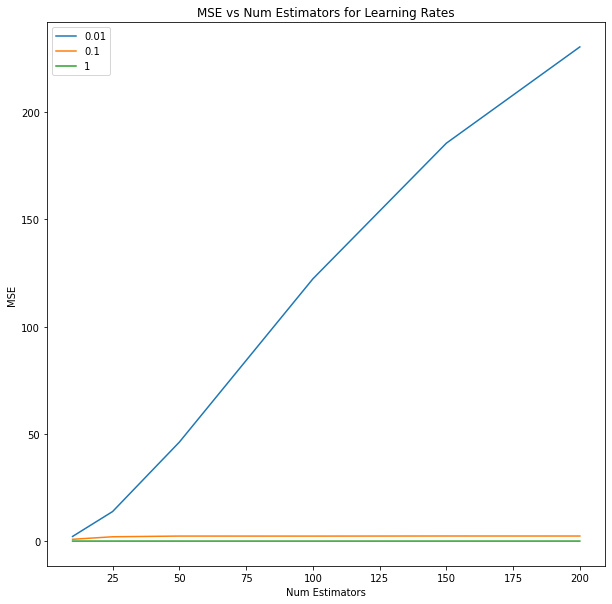

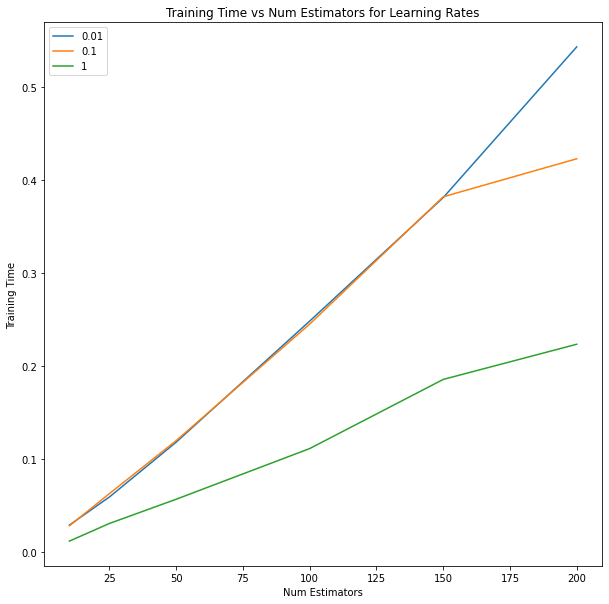

In [312]:
# plot the mse accuracies for different values of num_estimators and learning rate in same graph
plt.figure(figsize=(10, 10))
plt.xlabel('Num Estimators')
plt.ylabel('MSE')
plt.title('MSE vs Num Estimators for Learning Rates')
for i in range(len(learning_rate)):
    plt.plot(num_estimators, mse_matrix_gbr[:, i])
plt.legend(learning_rate)
plt.show()

# plot the training times for different values of num_estimators and learning rate in same graph
plt.figure(figsize=(10, 10))
plt.xlabel('Num Estimators')
plt.ylabel('Training Time')
plt.title('Training Time vs Num Estimators for Learning Rates')
for i in range(len(learning_rate)):
    plt.plot(num_estimators, training_time_gbr[:, i])
plt.legend(learning_rate)
plt.show()

In [313]:
# comparing the best results
index = np.argmin(mse_matrix_gbr)
best_estimator = index // len(learning_rate)
best_learning_rate = index % len(learning_rate)
print('For Gradient Boosting Regressor, ')
print('Minimum MSE is ', np.min(mse_matrix_gbr), ' and training time is ', training_time_gbr[best_estimator][best_learning_rate])

print('For Random Forest Regressor, ')
print('Minimum MSE is ', mse_matrix_rfr[best_feature][best_estimator][best_fraction], ' and training time is ', time_matrix_rfr[best_feature][best_estimator][best_fraction])

For Gradient Boosting Regressor, 
Minimum MSE is  0.1628762130193954  and training time is  0.1858506202697754
For Random Forest Regressor, 
Minimum MSE is  0.015136694203781845  and training time is  0.3668251037597656


### Analysis and Mistakes of these models

#### Mistakes of these models

- **RandomForest:**
    Random Forest might undergo overfitting if the number of trees is too high.

- **Decision Tree AdaBoost:**
    ADAboost is sensitive to noisy data and outliers. It can also be affected by overfitting if the base learner is too complex (high depth decision tree)

- **Gradient Boosting:**
    Gradient Boosting is sensitive to hyperparameter tuning, particularly learning rate and tree depth. It is also prone to overfitting, especially if the number of iterations is high.

#### Feature Similarity of Common Mistakes

Random Forests, AdaBoost, and Gradient Boosted Trees share certain aspects related to feature similarity:

1. **Feature Importance and Correlation:**
   These miss out on the feature importance of the correlated features. If data is too complex, it might be difficult to identify the most relevant features.

2. **Hyperparameter Tuning:**
   They are reliant on the hyperparameters like the number of estimators. If the number of estimators is too high, it might lead to overfitting. Similarily, if the depth is very less, it might lead to underfitting.

3. **Overfitting and Underfitting:**
    The methods can overfit and underfit. This is especially true for Gradient Boosting and Random Forests. If the number of estimators is too high, it might lead to overfitting. Similarily, if the depth is very less, it might lead to underfitting.

4. **Data Quality and Noise:**
   These are heavily influenced by the quality of the data. If the data has outliers, it might lead to overfitting. Similarily, if the data is noisy, it might lead to incorrect predictions. Especially in the case of AdaBoost, it is sensitive to noisy data and outliers, as it might give more weightage to the outliers.

5. **Computational Complexity:**
   These models may become computationally heavy when we scale them to big datasets.

Overall, these models are very similar in terms of the mistakes they make. They are all prone to overfitting and are sensitive to hyperparameter tuning. They are also heavily influenced by the quality of the data. So it is important to use the correct model for the correct data.

- For regression, ADABoost
- For classification and overall performance, Random Forests
- For intricate data, Gradient Boosting
